<a href="https://colab.research.google.com/github/dakshprsingh/zomato-data-analysis/blob/main/ZOMATO_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

file_path = '/content/data.xlsx'   # Load the Excel file
df = pd.read_excel(file_path)


print(df.head())   # Display the first few rows

                    name online_order book_table  Rating  votes      location  \
0                  Jalsa          Yes        Yes     4.1    775  Banashankari   
1         Spice Elephant          Yes         No     4.1    787  Banashankari   
2        San Churro Cafe          Yes         No     3.8    918  Banashankari   
3  Addhuri Udupi Bhojana           No         No     3.7     88  Banashankari   
4          Grand Village           No         No     3.8    166  Basavanagudi   

             rest_type                        cuisines  \
0        Casual Dining  North Indian, Mughlai, Chinese   
1        Casual Dining     Chinese, North Indian, Thai   
2  Cafe, Casual Dining          Cafe, Mexican, Italian   
3          Quick Bites      South Indian, North Indian   
4        Casual Dining        North Indian, Rajasthani   

   approx_cost(for two people) listed_in(type) listed_in(city)  
0                          800          Buffet    Banashankari  
1                          800    

In [4]:

print(f"Dataset shape: {df.shape}")   # Check the shape


print(df.dtypes)# Check data types


print(df.describe(include='all'))  # Get summary statistics


print(df.isnull().sum())  # Check missing values

Dataset shape: (41263, 11)
name                            object
online_order                    object
book_table                      object
Rating                         float64
votes                            int64
location                        object
rest_type                       object
cuisines                        object
approx_cost(for two people)      int64
listed_in(type)                 object
listed_in(city)                 object
dtype: object
                   name online_order book_table        Rating         votes  \
count             41263        41263      41263  41263.000000  41263.000000   
unique             6602            2          2           NaN           NaN   
top     Cafe Coffee Day          Yes         No           NaN           NaN   
freq                 86        27102      34959           NaN           NaN   
mean                NaN          NaN        NaN      3.702011    352.683179   
std                 NaN          NaN        NaN      0.4

In [5]:
# Example: Dropping rows where 'Restaurant Name' or 'Cuisines' are missing
df = df.dropna(subset=['name', 'cuisines'])

# Example: Filling missing ratings with the column's mean
if 'Rating' in df.columns:
    df['Rating'] = df['Rating'].fillna(df['Rating'].mean())


In [6]:
df = df.drop_duplicates()


In [7]:
df.columns = df.columns.str.strip()

# Clean 'cuisines'
df['cuisines'] = df['cuisines'].str.lower().str.strip()

# Clean 'location'
df['location'] = df['location'].str.strip().str.title()

# Clean 'approx_cost(for two people)'
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '')
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

In [8]:
# Ratings
df['Rating'] = df['Rating'].astype(str).str.strip().str.lower()
df['Rating'] = df['Rating'].replace(['new', '-'], pd.NA)
df['Rating'] = df['Rating'].str.extract(r'(\d+\.?\d*)')[0]
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# approx_cost(for two people)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '')
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

# Location
df['location'] = df['location'].str.strip().str.title()

In [9]:
# Converting 'Votes' and 'Price Range' to integers
df['votes'] = pd.to_numeric(df['votes'], errors='coerce').astype('Int64')
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce').astype('Int64')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [10]:
cleaned_file_path = '/content/cleaned_zomato_data.xlsx'
df.to_excel(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")

Cleaned dataset saved to /content/cleaned_zomato_data.xlsx


In [11]:
cuisine_group = df.groupby('cuisines').agg({
    'Rating': 'mean',
    'votes': 'mean',
    'approx_cost(for two people)': 'mean'
}).reset_index()

#Step 2: Sort by rating and then by votes
cuisine_group = cuisine_group.sort_values(by=['Rating', 'votes'], ascending=[False, False])

# Step 3: Display top 10 cuisines
top_cuisines = cuisine_group.head(10)

print(top_cuisines)

                                               cuisines    Rating  \
1001  continental, north indian, italian, south indi...  4.900000   
172                         asian, chinese, thai, momos  4.900000   
1274                 healthy food, salad, mediterranean  4.900000   
1816         north indian, european, mediterranean, bbq  4.800000   
192             asian, mediterranean, north indian, bbq  4.800000   
989   continental, north indian, chinese, european, ...  4.800000   
1087         european, mediterranean, north indian, bbq  4.789474   
48              american, tex-mex, burger, bbq, mexican  4.750000   
1323                           italian, american, pizza  4.700000   
1815              north indian, european, mediterranean  4.700000   

             votes  approx_cost(for two people)  
1001       16588.5                       1600.0  
172    2224.894737                       1500.0  
1274         246.0                       1000.0  
1816        7127.4                      

In [12]:
top_cuisines_by_rating = cuisine_group.sort_values(by='Rating', ascending=False).head(5)
top_cuisines_by_votes = cuisine_group.sort_values(by='votes', ascending=False).head(5)

print ("Top 5 Cuisines by Rating:")
print(top_cuisines_by_rating)

print("\nTop 5 Cuisines by Votes:")
print(top_cuisines_by_votes)


Top 5 Cuisines by Rating:
                                               cuisines  Rating        votes  \
1001  continental, north indian, italian, south indi...     4.9      16588.5   
172                         asian, chinese, thai, momos     4.9  2224.894737   
1274                 healthy food, salad, mediterranean     4.9        246.0   
1816         north indian, european, mediterranean, bbq     4.8       7127.4   
192             asian, mediterranean, north indian, bbq     4.8  4992.666667   

      approx_cost(for two people)  
1001                       1600.0  
172                        1500.0  
1274                       1000.0  
1816                       1500.0  
192                        1400.0  

Top 5 Cuisines by Votes:
                                               cuisines  Rating         votes  \
1001  continental, north indian, italian, south indi...    4.90       16588.5   
1323                           italian, american, pizza    4.70       14956.0   
1815    

In [13]:
best_rated = df.sort_values(by='Rating', ascending=False).head(10)
best_rated = best_rated[['name', 'cuisines', 'Rating', 'votes', 'approx_cost(for two people)']]
print(best_rated)

                                 name  \
6318                         Flechazo   
15341       AB's - Absolute Barbecues   
29110  Asia Kitchen By Mainland China   
31482                    Punjab Grill   
3172      Byg Brewski Brewing Company   
30050          Belgian Waffle Factory   
39351     Byg Brewski Brewing Company   
31927                    Punjab Grill   
26888  Asia Kitchen By Mainland China   
9361           Belgian Waffle Factory   

                                                cuisines  Rating  votes  \
6318             asian, mediterranean, north indian, bbq     4.9   2745   
15341         european, mediterranean, north indian, bbq     4.9   6404   
29110                        asian, chinese, thai, momos     4.9   2254   
31482                              north indian, mughlai     4.9   1940   
3172   continental, north indian, italian, south indi...     4.9  16345   
30050                                           desserts     4.9   1749   
39351  continental, nor

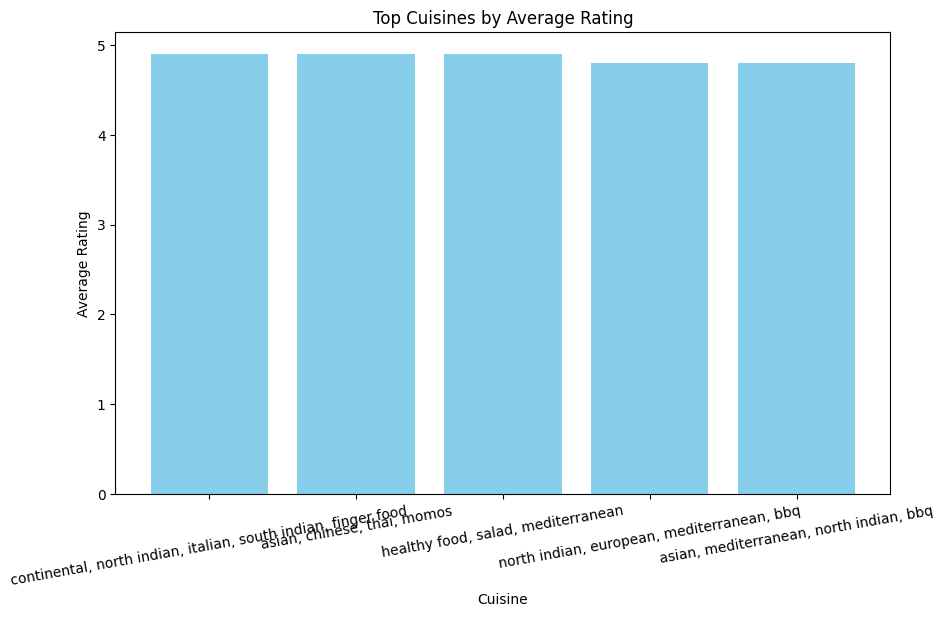

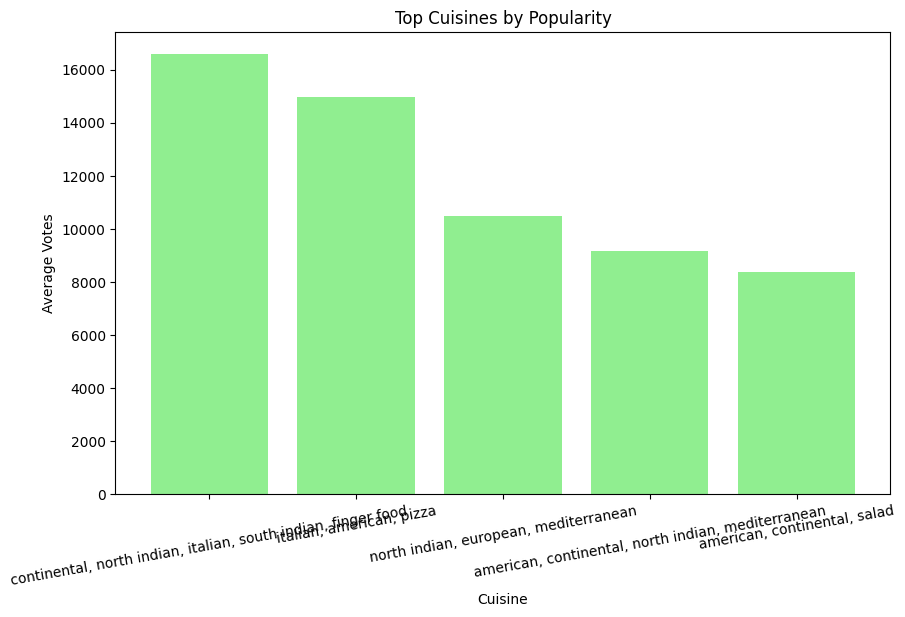

In [14]:
import matplotlib.pyplot as plt

# Plot top cuisines by rating
plt.figure(figsize=(10,6))
plt.bar(top_cuisines_by_rating['cuisines'], top_cuisines_by_rating['Rating'], color='skyblue')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.title('Top Cuisines by Average Rating')
plt.xticks(rotation=10)
plt.show()

# Plot top cuisines by votes
plt.figure(figsize=(10,6))
plt.bar(top_cuisines_by_votes['cuisines'], top_cuisines_by_votes['votes'], color='lightgreen')
plt.xlabel('Cuisine')
plt.ylabel('Average Votes')
plt.title('Top Cuisines by Popularity')
plt.xticks(rotation=10)
plt.show()